In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import EfficientFrontier

from sharp_max import plot_market_values

In [2]:
nifty_50 = [1009.23, 1042.67, 1077.21, 1029.77, 1057.35, 1091.37, 1102.64, 1079.31, 1074.68, 1059.38, 
            1055.83, 1010.54, 1057.74, 1090.11, 1108.74, 1121.76, 1182.31, 1170.36, 1147.78, 1172.84, 
            1176.27, 1156.89, 1200.20, 1267.08, 1305.20, 1307.28, 1323.31, 1301.90]


In [ ]:
real_returns = pd.Series([d['capital'] for d in all_results_real])
pred_returns = pd.Series([d['capital'] for d in all_results_pred])
pred_sent_returns = pd.Series([d['capital'] for d in all_results_sent])
pred_nifty = pd.Series(nifty_50)


# Create a DataFrame from these series
df = pd.DataFrame({'real': real_returns, 'pred': pred_returns, 'sent': pred_sent_returns, 'NIFTY50' : pred_nifty})

df.to_csv('temp/treiding_period.csv')

In [7]:
df = pd.read_csv('temp/treiding_period.csv', index_col = 0)
df

,real,pred,sent,NIFTY50
0,1032.140947,1029.834401,1031.129557,1009.23
1,1060.833217,1045.213977,1052.253418,1042.67
2,1062.827735,1043.242304,1051.302497,1077.21
3,1065.625167,1062.764296,1074.337835,1029.77
4,1085.381591,1065.881752,1078.460562,1057.35
5,1163.645896,1118.329008,1141.326116,1091.37
6,1191.039344,1143.745336,1166.856743,1102.64
7,1228.637597,1189.367968,1221.538449,1079.31
8,1258.433599,1221.491916,1256.001555,1074.68
9,1262.306762,1222.307783,1256.189764,1059.38


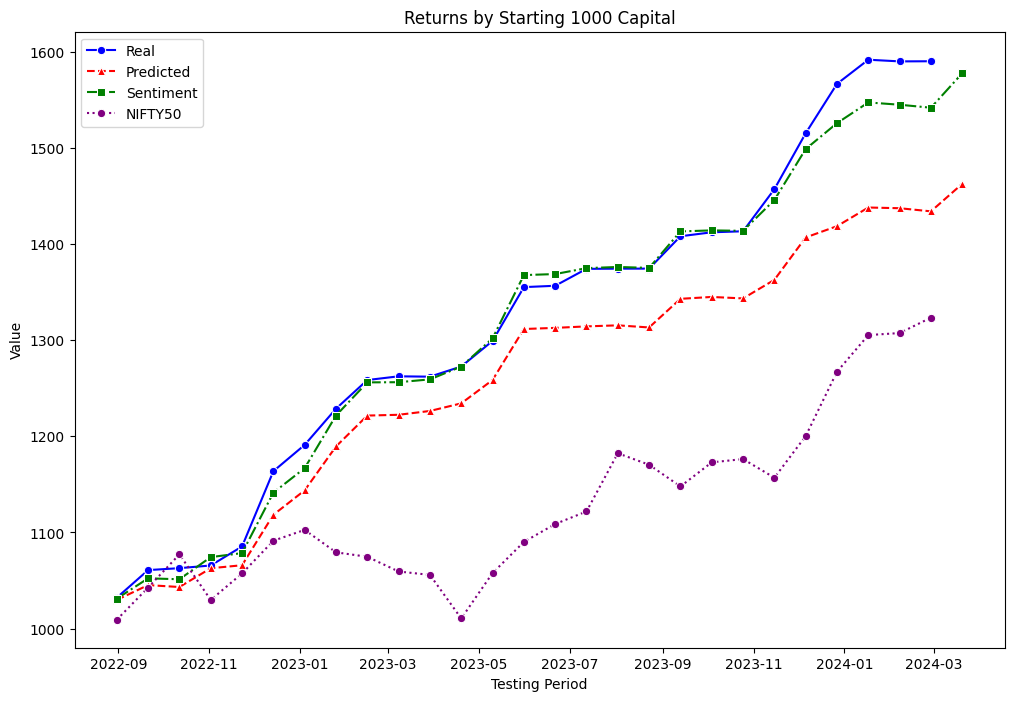

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas.tseries.offsets import BDay

# Load the data
df = pd.read_csv('temp/treiding_period.csv')

# Drop the last three entries from 'real' and 'NIFTY50' columns
df['real'] = df['real'][:-3]
df['NIFTY50'] = df['NIFTY50'][:-3]
df['sent'] = df['sent'][:-2]
df['pred'] = df['pred'][:-2]

# Number of periods
num_periods = len(df)

# Generate end dates for each period, assuming each period is 15 trading days
end_date = pd.Timestamp('2024-05-01')
dates = [end_date - BDay(15 * i) for i in range(num_periods)]
dates.reverse()  # Reverse to have them in ascending order

# Plotting with seaborn for a more stylish appearance
plt.figure(figsize=(12, 8))
sns.lineplot(x=dates, y=df['real'], label='Real', marker='o', linestyle='-', color='blue')
sns.lineplot(x=dates, y=df['pred'], label='Predicted', marker='^', linestyle='--', color='red')
sns.lineplot(x=dates, y=df['sent'], label='Sentiment', marker='s', linestyle='-.', color='green')
sns.lineplot(x=dates, y=df['NIFTY50'], label='NIFTY50', marker='o', linestyle=':', color='purple')

plt.xlabel('Testing Period')
plt.ylabel('Value')
plt.title('Returns by Starting 1000 Capital')
plt.legend()
plt.show()